In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
import pylab as pl
import numpy as np  
import pandas as pd
%matplotlib inline

#### Import XOR AVO table

In [2]:
data = pd.read_csv('XOR.txt', sep="	")

In [3]:
data

,A,B,label,colour,interface
0,-1,-1,2,red,Top_gas
1,1,-1,0,blue,Top_wet
2,1,1,2,red,Base_gas
3,-1,1,0,blue,Base_wet


#### Add new coordinate Z

In [4]:
data['Z'] = np.sqrt(np.square(data["A"]+data["B"]))
data

,A,B,label,colour,interface,Z
0,-1,-1,2,red,Top_gas,2.0
1,1,-1,0,blue,Top_wet,0.0
2,1,1,2,red,Base_gas,2.0
3,-1,1,0,blue,Base_wet,0.0


In [5]:
cols=["A","B", "Z", "label", "interface", "colour"]
data=data.reindex(columns=cols)
data

,A,B,Z,label,interface,colour
0,-1,-1,2.0,2,Top_gas,red
1,1,-1,0.0,0,Top_wet,blue
2,1,1,2.0,2,Base_gas,red
3,-1,1,0.0,0,Base_wet,blue


#### Plot Z =  np.sqrt(np.square(A + B)) plane

In [6]:
x_min = -2.5; x_max = 2.5
y_min = -2.5; y_max = 2.5

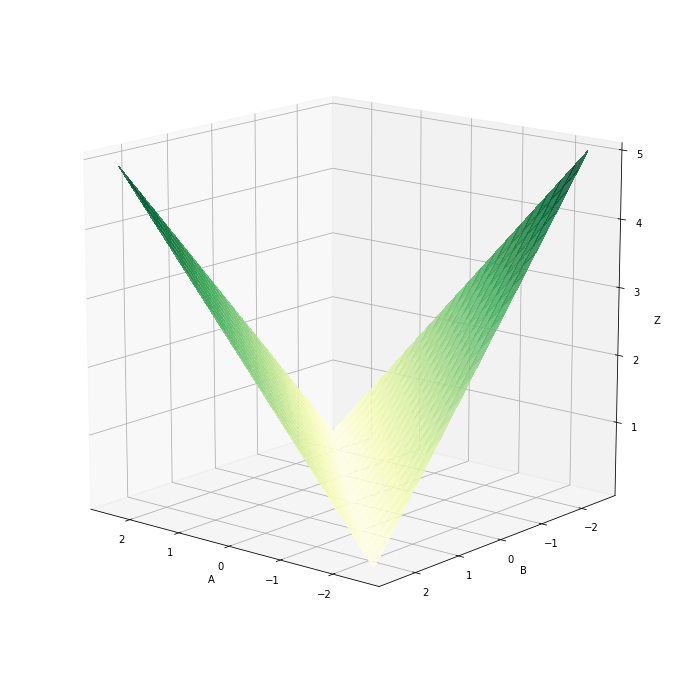

In [7]:
h = 0.05  # step size in the mesh
xxx, yyy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zzz = np.sqrt(np.square(xxx+yyy))

ls = LightSource(310, 45)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xxx, yyy, zzz, rstride=5, cstride=5,
                       linewidth=0, antialiased=False,  cmap = cm.YlGn, alpha = 0.8)

ax.view_init(15, 130)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Z')

plt.show()

#### Plot ABZ points

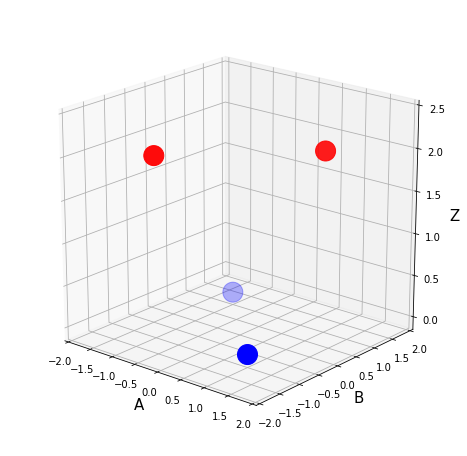

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(20, 310)
ax.set_xlabel('A', fontsize=15)
ax.set_ylabel('B', fontsize=15)
ax.set_zlabel('Z', fontsize=15)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-0.1, 2.5)

ax.scatter(data["A"], data["B"], data["Z"], c = data["colour"], s = 400)

fig.savefig('XOR_Z.png', dpi=400, bbox_inches='tight', pad_inches=0.4)
plt.show()

In [9]:
data['Z'] = np.sqrt(np.square(data["A"]+data["B"])).astype(int)
data

,A,B,Z,label,interface,colour
0,-1,-1,2,2,Top_gas,red
1,1,-1,0,0,Top_wet,blue
2,1,1,2,2,Base_gas,red
3,-1,1,0,0,Base_wet,blue
